In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set a path
path= r"C:\Users\Holly\OneDrive\David's work\project 1 machine learning\02 Data"

In [5]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [7]:
# Import cleaned weather observations data
X = pd.read_csv(os.path.join(path, 'weather_cleaned.csv'), index_col = False)

In [9]:
# Import predictions data
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [11]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [13]:
X.shape

(22950, 137)

In [15]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
answers.shape

(22950, 16)

## Data Wrangling

In [20]:
# Create a list of the columns containing "Munchenb" in their names
munchenb_list = list(x for x in X.columns if x.find('MUNCHENB') >=0)
munchenb_list

['MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max']

In [22]:
# Create a dataframe with those columns
df_munchenb = X[munchenb_list]
df_munchenb

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max
0,5,0.67,1.0180,0.20,0.10,0.0,6.9,1.1,10.4
1,6,0.72,1.0180,0.61,0.30,5.1,6.2,4.2,10.2
2,6,0.91,1.0180,0.20,0.30,0.0,5.8,4.0,8.0
3,6,0.90,1.0180,0.20,0.01,0.0,3.9,3.2,5.4
4,5,0.85,1.0180,0.65,0.96,5.6,1.8,-3.0,6.0
...,...,...,...,...,...,...,...,...,...
22945,2,0.76,1.0248,1.37,0.26,9.7,14.3,8.3,22.2
22946,6,0.70,1.0244,1.37,0.26,7.7,16.1,8.9,26.1
22947,7,0.64,1.0227,1.37,0.26,6.8,17.4,11.2,26.2
22948,6,0.75,1.0212,1.37,0.26,8.3,14.5,9.2,23.5


In [24]:
# Reduce answers dataset to Munchenb answers only
answers_munchenb = answers['MUNCHENB_pleasant_weather']
answers_munchenb

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MUNCHENB_pleasant_weather, Length: 22950, dtype: int64

In [26]:
df_munchenb.shape # observations dataset has the correct shape

(22950, 9)

In [28]:
answers_munchenb.shape # predictions dataset has the correct shape

(22950,)

## Reshaping the model

In [33]:
X2 = df_munchenb

In [35]:
y2 = answers_munchenb

In [37]:
# Turn X2 and y2 from df to arrays
X = np.array(X2)
y = np.array(y2)

In [39]:
X.shape

(22950, 9)

In [41]:
y.shape

(22950,)

## Data Split

In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [46]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [48]:
X_train

array([[ 2.    ,  0.62  ,  1.0131, ..., 19.1   , 12.6   , 25.6   ],
       [ 8.    ,  0.78  ,  1.0166, ..., -4.8   , -7.8   , -1.5   ],
       [ 6.    ,  0.82  ,  1.0097, ..., -2.4   , -3.9   ,  0.5   ],
       ...,
       [ 5.    ,  0.75  ,  1.018 , ...,  5.8   ,  3.1   , 10.8   ],
       [ 5.    ,  0.71  ,  1.018 , ..., 11.    ,  8.9   , 16.3   ],
       [ 5.    ,  0.56  ,  1.0195, ..., 10.    ,  5.4   , 13.8   ]])

In [53]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
X_test

array([[ 8.    ,  0.69  ,  1.0168, ..., 15.    , 12.9   , 17.1   ],
       [ 5.    ,  0.72  ,  1.013 , ..., -1.1   , -8.4   ,  5.2   ],
       [ 6.    ,  0.67  ,  1.0122, ..., 20.    , 12.9   , 25.6   ],
       ...,
       [ 3.    ,  0.8   ,  1.018 , ...,  8.    , -0.3   , 18.9   ],
       [ 4.    ,  0.68  ,  1.0243, ...,  5.8   ,  4.1   , 10.4   ],
       [ 5.    ,  0.68  ,  1.0202, ..., 20.2   , 10.7   , 27.4   ]])

In [57]:
y_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

## Random Forest Model

In [60]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


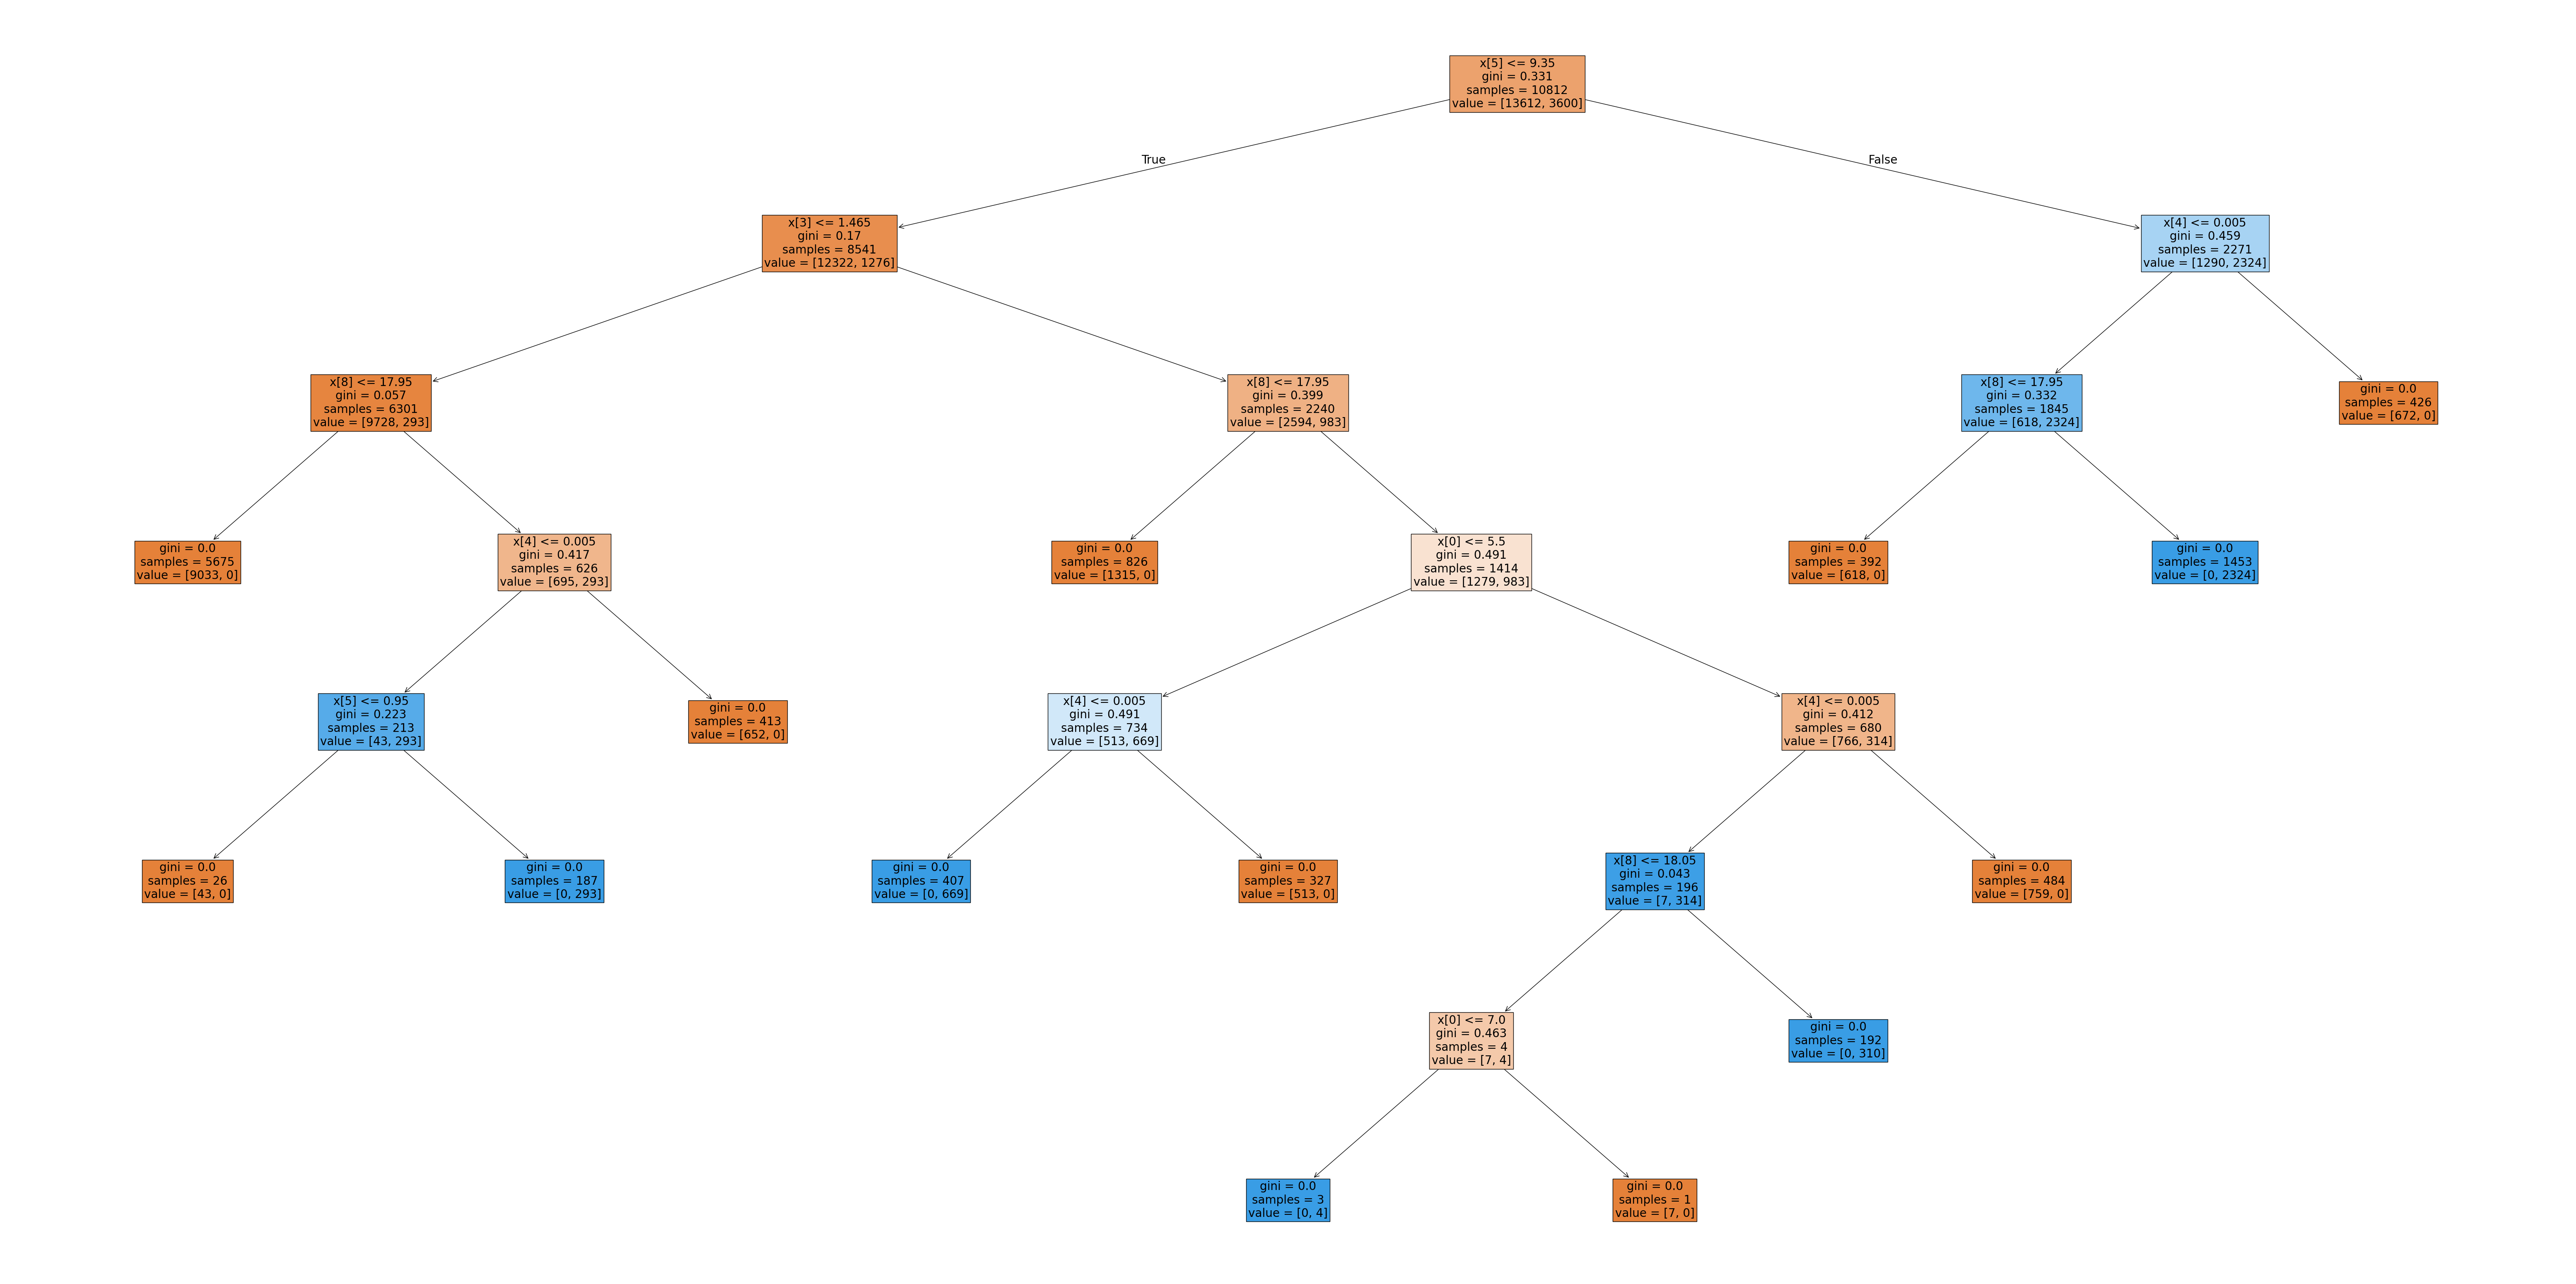

In [64]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [66]:
fig.savefig(os.path.join(path, 'random_forest_Munchenb.png'),bbox_inches='tight')

## Uncovering Feature Performance

In [69]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.045121  , 0.01251375, 0.00408611, 0.05377744, 0.37425461,
       0.09717188, 0.14016991, 0.01653836, 0.25636693])

In [71]:
# Create a list of weather features
wx_list = [feature.replace('MUNCHENB_', '') for feature in munchenb_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [73]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.045121
humidity            0.012514
pressure            0.004086
global_radiation    0.053777
precipitation       0.374255
sunshine            0.097172
temp_mean           0.140170
temp_min            0.016538
temp_max            0.256367
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


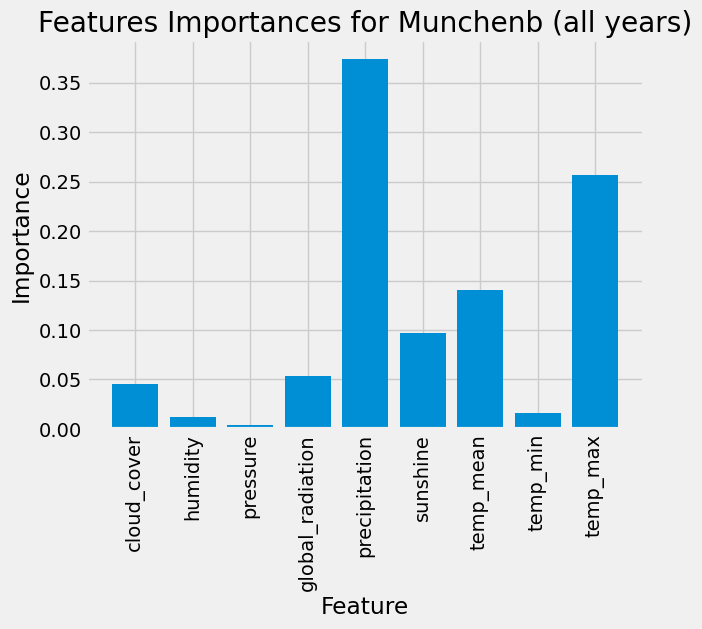

In [75]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Munchenb (all years)');

plt.savefig(os.path.join(path, 'Munchenb_feature_importances.png'), bbox_inches='tight')
plt.show()